In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
data = pd.read_csv('adult/adult.data')

In [14]:
data.columns

Index(['AGE', ' Workclass', ' Final_weight', ' Education',
       ' Years of education', ' Marital Status', ' Occupation',
       ' Relationship', ' Race', ' Sex', ' Capital gain', ' Capital loss',
       ' Hours per week', ' Native country', ' Income'],
      dtype='object')

In [15]:
data.shape

(32561, 15)

In [16]:
data.isnull().sum()

AGE                    0
 Workclass             0
 Final_weight          0
 Education             0
 Years of education    0
 Marital Status        0
 Occupation            0
 Relationship          0
 Race                  0
 Sex                   0
 Capital gain          0
 Capital loss          0
 Hours per week        0
 Native country        0
 Income                0
dtype: int64

array([[<Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': ' Final_weight'}>],
       [<Axes: title={'center': ' Years of education'}>,
        <Axes: title={'center': ' Capital gain'}>],
       [<Axes: title={'center': ' Capital loss'}>,
        <Axes: title={'center': ' Hours per week'}>]], dtype=object)

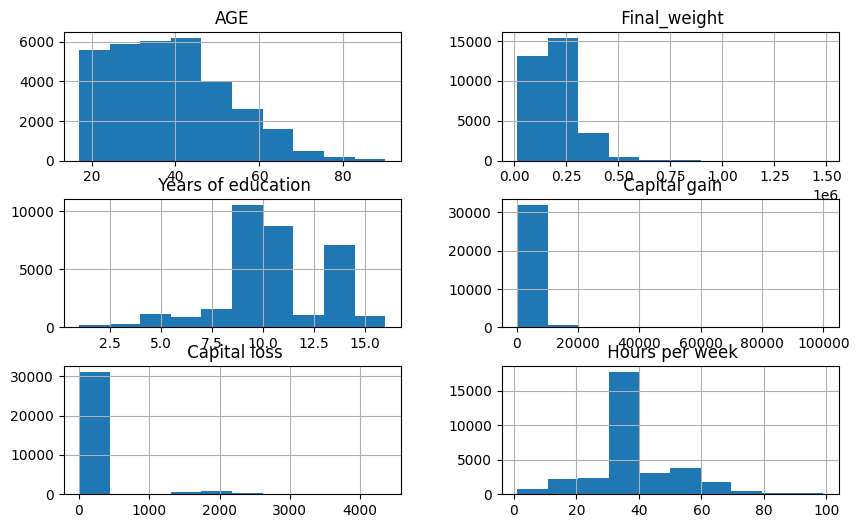

In [17]:
data.hist(bins=10, figsize=(10,6))


In [18]:
data.head()

,AGE,Workclass,Final_weight,Education,Years of education,Marital Status,Occupation,Relationship,Race,Sex,Capital gain,Capital loss,Hours per week,Native country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [19]:
for col in data.columns:
    if data[col].dtype == object:
        print(f"Unique values in {col}: {data[col].unique()}")

Unique values in  Workclass: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Unique values in  Education: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Unique values in  Marital Status: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
Unique values in  Occupation: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
Unique values in  Relationship: [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
Unique values in  Race: [' White' ' Black' ' Asian-Pac-Islander' ' Am

## converting categorical values into numerical by using encoding and mapping techniques

We can use multiple techniques 

# 🚀 Summary Table of Encoding Techniques

| Encoding Type          | Best for            | Pros                                      | Cons                                  |
|------------------------|--------------------|------------------------------------------|---------------------------------------|
| **One-Hot Encoding**   | Nominal            | Simple, widely used                      | High memory usage                     |
| **Label Encoding**     | Ordinal            | Fast, simple                             | Misinterprets ordinal importance      |
| **Ordinal Encoding**   | Ordered categories | Captures order                           | Requires domain knowledge             |
| **Target Encoding**    | High-cardinality   | Efficient, useful for categorical-target relationships | Risk of data leakage |
| **Frequency Encoding** | High-cardinality   | Reduces dimensions                       | Can misrepresent categories           |
| **Binary Encoding**    | Large categories   | Space-efficient                          | May lose information                  |
| **Hash Encoding**      | Large categories   | Handles high-cardinality well            | Risk of collisions                    |
| **Word Embedding**     | Text               | Captures semantic meaning                | Requires NLP processing               |

In [21]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

# Define categorical features
categorical_features = {
    "ordinal": ["Education", "Workclass", "Marital Status", "Occupation", "Relationship", "Race", "Sex"],  # Use ordinal instead of OHE
    "label": ["Income"]
}

# Define encoders
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)  # Handles unseen values
label_encoder = LabelEncoder()

# Apply ordinal encoding for all categorical features
for feature in categorical_features["ordinal"]:
    if feature in data.columns:  # Ensure the column exists
        data[feature] = ordinal_encoder.fit_transform(data[[feature]])
    else:
        print(f"⚠️ Skipping '{feature}' - Column not found in dataset.")

# Apply label encoding for target variable
for feature in categorical_features["label"]:
    if feature in data.columns:
        data[feature] = label_encoder.fit_transform(data[feature])

# Handle 'Native Country' column if it exists
if "Native country" in data.columns:
    data["Native country"] = ordinal_encoder.fit_transform(data[["Native country"]])

# Display first few rows of transformed dataset
print(data.head())

   AGE  Workclass  Final_weight  Education  Years of education  \
0   39        7.0         77516        9.0                  13   
1   50        6.0         83311        9.0                  13   
2   38        4.0        215646       11.0                   9   
3   53        4.0        234721        1.0                   7   
4   28        4.0        338409        9.0                  13   

   Marital Status  Occupation  Relationship  Race  Sex  Capital gain  \
0             4.0         1.0           1.0   4.0  1.0          2174   
1             2.0         4.0           0.0   4.0  1.0             0   
2             0.0         6.0           1.0   4.0  1.0             0   
3             2.0         6.0           0.0   2.0  1.0             0   
4             2.0        10.0           5.0   2.0  0.0             0   

   Capital loss  Hours per week  Native country  Income  
0             0              40            39.0       0  
1             0              13            39.0       

In [24]:
data.corr()

,AGE,Workclass,Final_weight,Education,Years of education,Marital Status,Occupation,Relationship,Race,Sex,Capital gain,Capital loss,Hours per week,Native country,Income
AGE,1.000000,0.003787,-0.076646,-0.010508,0.036527,-0.266288,-0.020947,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234037
Workclass,0.003787,1.000000,-0.016656,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.049742,0.095981,0.033835,0.012216,0.138962,-0.007690,0.051604
Final_weight,-0.076646,-0.016656,1.000000,-0.028145,-0.043195,0.028153,0.001597,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.051966,-0.009463
Education,-0.010508,0.023513,-0.028145,1.000000,0.359153,-0.038407,-0.021260,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.064288,0.079317
Years of education,0.036527,0.052085,-0.043195,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.050840,0.335154
Marital Status,-0.266288,-0.064731,0.028153,-0.038407,-0.069304,1.000000,-0.009654,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.023819,-0.199307
Occupation,-0.020947,0.254892,0.001597,-0.021260,0.109697,-0.009654,1.000000,-0.075607,0.006763,0.080296,0.025505,0.017987,0.080383,-0.012543,0.075468
Relationship,-0.263698,-0.090461,0.008931,-0.010876,-0.094153,0.185451,-0.075607,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.005507,-0.250918
Race,0.028718,0.049742,-0.021291,0.014131,0.031838,-0.068013,0.006763,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.137852,0.071846
Sex,0.088832,0.095981,0.026858,-0.027356,0.012280,-0.129314,0.080296,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,-0.008119,0.215980
